# Set target LAT/LON

In [1]:
target_lon = 21.74
target_lat = 36.9

# IMPORTS

In [20]:
import numpy as np
import xarray as xr
import pandas as pd

import pygrib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Load DATA in xarray and print variable

In [8]:
grib = 'C:/Users/aggelosuser/Desktop/93fdfdf2-11e1-4084-b25e-10b95856678b.grib'

In [9]:
ds = xr.open_dataset(grib, engine="cfgrib")

In [10]:
for v in ds:
    print("{}, {}, {}".format(v, ds[v].attrs["long_name"], ds[v].attrs["units"]))

t2m, 2 metre temperature, K


# Generate series with necessary timestamps

In [50]:
def generate_timestamps(start_timestamp, num_steps):
    timestamps = []
    current_timestamp = start_timestamp
    for _ in range(num_steps):
        timestamps.append(current_timestamp)
        current_timestamp += np.timedelta64(1, 'h')
    return timestamps

start_timestamp = ds.time.values
num_steps = 49
timestamps = generate_timestamps(start_timestamp, num_steps)

#for ts in timestamps:
#   print(ts)

# Load first timestep of Data with pygrib and perform regriding LAT/LON convertions

In [13]:
grbs = pygrib.open(grib)
 
grb = grbs.select()[0]

data = grb.values

In [14]:
lat, lon = grb.latlons() 

In [15]:
values = []
for longit in lon:
    print(longit)
    values.append(longit[0])
    break

[0.00000000e+00 3.51562554e-02 7.03125108e-02 ... 3.59894586e+02
 3.59929743e+02 3.59964899e+02]


In [16]:
latitudes = np.unique(lat.flatten())
longitudes = lon[0]

# Load the rest timesteps and convert them accordingly

In [17]:
target_data = []

for timestamp in range(49):  # 0 to 48
    try:
        grb_steps = grbs.select()[timestamp]  # Select the record corresponding to the timestamp
        data_steps = grb_steps.values

        ds0 = xr.Dataset(
            data_vars={"ice": (["latitude", "longitude"], data_steps)},
            coords={
                "latitude": latitudes,
                "longitude": longitudes,
            },
        )
        
        target_pixel = ds0.sel(longitude=target_lon, latitude=target_lat, method='nearest')
        target_pixel = target_pixel.ice.values
        target_data.append(target_pixel)
    except IndexError:
        print(f"No record found for timestamp {timestamp}")
    except Exception as e:
        print(f"Error processing timestamp {timestamp}: {e}")

# Close the GRIB file
grbs.close()

# Create target DataFrame and plot it

In [58]:
target_df = pd.DataFrame()

In [62]:
target_df['var'] = pd.to_numeric(target_data, errors='coerce')

In [63]:
target_df.set_index(np.array(timestamps), inplace=True)

In [71]:
#target_df

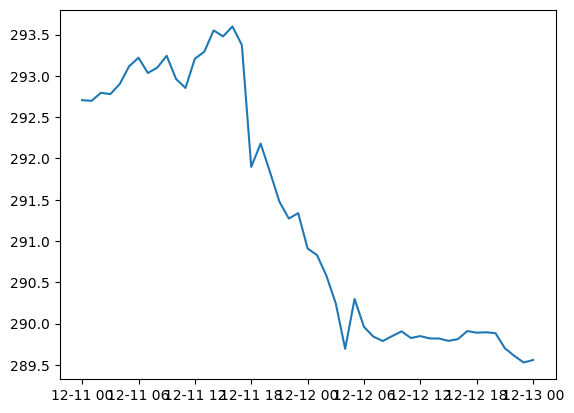

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(target_df.index, target_df["var"])
plt.show()

In [54]:
#target_lon = 21.74
#target_lat = 36.9

#kynhgos = ds0.sel(latitude = slice(target_lat-0.01, target_lat+0.05), longitude = slice(target_lon-0.05, target_lon))
kynhgos = ds0.sel(longitude=target_lon, latitude=target_laty, method='nearest')

In [59]:
kynhgos.ice.values

array(292.70577753)